In [12]:
# run `pip install medmnist` in terminal
import medmnist
from medmnist import BloodMNIST

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# downloads bloodmnist.npz file 
# at /Users/username/.medmnist/bloodmnist.npz
# 28 pixel resolution
# image dimension is 28x28x3
train_df = BloodMNIST(split="train", download=True)
val_df = BloodMNIST(split="val", download=True)
test_df = BloodMNIST(split="test", download=True)

100%|██████████| 35.5M/35.5M [00:01<00:00, 19.3MB/s]


In [3]:
# train metadata
train_df

Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 11959
    Root location: /Users/cecejen/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    Lice

In [4]:
# validation metadata
val_df

Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 1712
    Root location: /Users/cecejen/.medmnist
    Split: val
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    License

In [5]:
# test metadata
test_df

Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 3421
    Root location: /Users/cecejen/.medmnist
    Split: test
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    Licens

In [15]:
# copy downloaded bloodmnist.npz file to current working directory
# cp -r /Users/username/.medmnist/bloodmnist.npz .
# load in file and check names of attributes
data = np.load("bloodmnist.npz")
data.files

['train_images',
 'train_labels',
 'val_images',
 'val_labels',
 'test_images',
 'test_labels']

In [17]:
# mapping label numbers to cell types as in metadata
label_dict = {"0": "basophil", "1": "eosinophil", "2": "erythroblast", \
              "3": "immature granulocytes", "4": "lymphocyte", \
              "5": "monocyte", "6": "neutrophil", "7": "platelet"}

In [19]:
# extracting images and labels
# train set
train_images = data["train_images"]
train_labels = data["train_labels"].flatten()

# validation_set
val_images = data["val_images"]
val_labels = data["val_labels"].flatten()

# test_set
test_images = data["test_images"]
test_labels = data["test_labels"].flatten()

In [21]:
# concatenanting all images and labels 
cat_images = np.concatenate([train_images, val_images, test_images])
cat_labels = np.concatenate([train_labels, val_labels, test_labels])

In [23]:
# creating a dictionary as label:[images]
class_dict = {k:[] for k in np.arange(8)}
for i, j in zip(cat_labels, cat_images):
    class_dict[i].append(j)

In [25]:
# calculating the average image for each class
# creating dictionary as label:avg_image
average_dict = {k:[] for k in np.arange(8)}
for i in class_dict:
    class_images = class_dict[i]
    class_all = np.stack(class_images, axis=0) 
    class_avg = np.mean(class_all, axis=0)
    average_dict[i] = class_avg

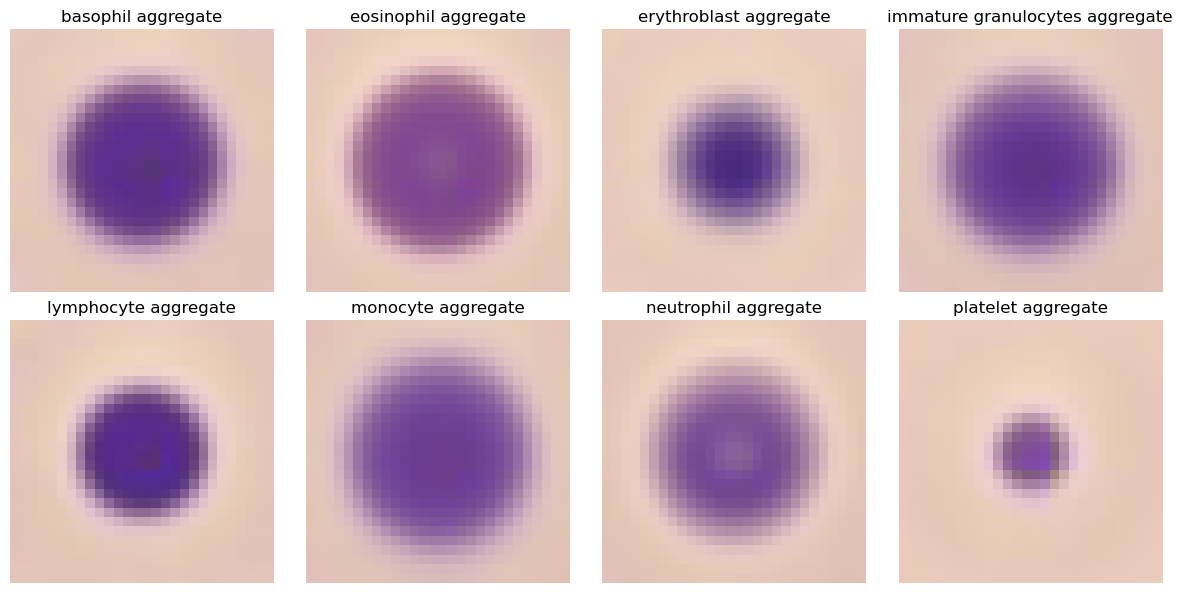

In [27]:
# plotting aggregated images for each cell class
# for 28x28x3 resolution
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    avg_image = average_dict[i]
    norm_image = avg_image/255
    ax.imshow(norm_image)  
    ax.axis('off') 
    ax.set_title(f"{label_dict[str(i)]} aggregate") 
plt.tight_layout() 
plt.show()

In [29]:
# downloads bloodmnist_224.npz file 
# at /Users/username/.medmnist/bloodmnist_224.npz
# 224 pixel resolution
# image dimension is 224x224x3
train_df = BloodMNIST(split="train", download=True, size=224)
val_df = BloodMNIST(split="val", download=True, size=224)
test_df = BloodMNIST(split="test", download=True, size=224)

100%|██████████| 1.54G/1.54G [00:57<00:00, 26.9MB/s] 


In [32]:
# copy downloaded bloodmnist.npz file to current working directory
# cp -r /Users/username/.medmnist/bloodmnist_224.npz .
# load in file and check names of attributes
data = np.load("bloodmnist_224.npz")
data.files

['train_images',
 'train_labels',
 'val_images',
 'val_labels',
 'test_images',
 'test_labels']

In [34]:
# extracting images and labels
# train set
train_images = data["train_images"]
train_labels = data["train_labels"].flatten()

# validation_set
val_images = data["val_images"]
val_labels = data["val_labels"].flatten()

# test_set
test_images = data["test_images"]
test_labels = data["test_labels"].flatten()

In [35]:
# concatenanting all images and labels 
cat_images = np.concatenate([train_images, val_images, test_images])
cat_labels = np.concatenate([train_labels, val_labels, test_labels])

In [40]:
# creating a dictionary as label:[images]
class_dict = {k:[] for k in np.arange(8)}
for i, j in zip(cat_labels, cat_images):
    class_dict[i].append(j)

In [43]:
# calculating the average image for each class
# creating dictionary as label:avg_image
average_dict = {k:[] for k in np.arange(8)}
for i in class_dict:
    class_images = class_dict[i]
    class_all = np.stack(class_images, axis=0) 
    class_avg = np.mean(class_all, axis=0)
    average_dict[i] = class_avg

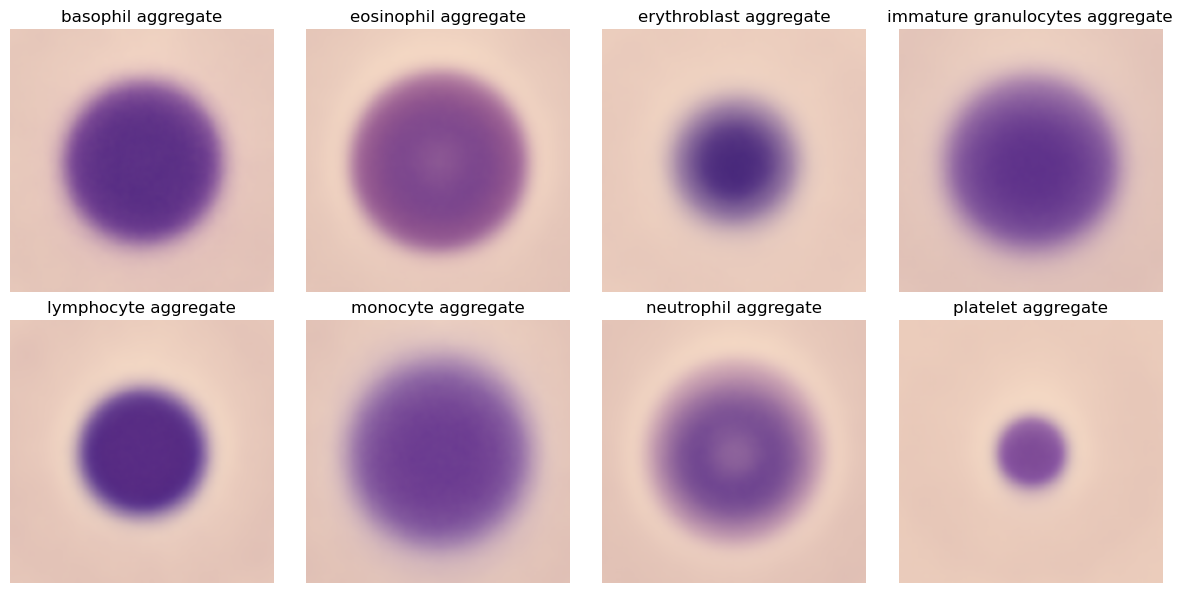

In [45]:
# plotting aggregated images for each cell class
# for 224x224x3 resolution
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    avg_image = average_dict[i]
    norm_image = avg_image/255
    ax.imshow(norm_image)  
    ax.axis('off') 
    ax.set_title(f"{label_dict[str(i)]} aggregate") 
plt.tight_layout() 
plt.show()

### Our ResNet Model:

In [65]:
from torch .utils.data import TensorDataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, roc_auc_score
from models import ResNet18, ResNet50
import gc

#### BasicBlock (reference: ResNet18)

In [92]:
class ourBasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(ourBasicBlock, self).__init__()

        # 1st convolutional layer (7x7)
            # kernel_size: 3 → 7, capture more features
            # padding: 1 → 3 for 7x7 kernel
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=7, 
                               stride=stride, padding=3, bias=False)
            # BatchNorm2D -> GroupNorm, better for small batches
        self.norm1 = nn.GroupNorm(num_groups=4, num_channels=planes) 

        # 2nd convolution layer (3x3)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, 
                               stride=1, padding=1, bias=False)
        self.norm2 = nn.GroupNorm(num_groups=4, num_channels=planes)

        # skip connection
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                # downsized to 1x1 instead for matching input and output channel
                nn.Conv2d(in_planes, planes, kernel_size=1, stride=stride, bias=False),
                # GroupNorm instead
                nn.GroupNorm(num_groups=4, num_channels=planes)
            )

    def forward(self, x):
        out = F.relu(self.norm1(self.conv1(x))) # introduces non-linearity, capture features
        out = self.norm2(self.conv2(out))
        out += self.shortcut(x) 
        return F.relu(out)

#### BottlenckBlock (reference: ResNet50)

In [94]:
class ourBottleneckBlock(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(ourBottleneckBlock, self).__init__()

        # 1st convolution layer (1x1)
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.norm1 = nn.GroupNorm(num_groups=8, num_channels=planes) # GroupNorm

        # 2nd convolution layer (3x3)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.norm2 = nn.GroupNorm(num_groups=8, num_channels=planes)

        # 3rd convolution layer (1x1)
        out_channels = planes * self.expansion
        self.conv3 = nn.Conv2d(planes, out_channels, kernel_size=1, bias=False)
        self.norm3 = nn.GroupNorm(num_groups=8, num_channels=out_channels)

        # skip connection
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.GroupNorm(num_groups=8, num_channels=out_channels)
            )

    def forward(self, x):
        out = F.relu(self.norm1(self.conv1(x)))
        out = F.relu(self.norm2(self.conv2(out)))
        out = self.norm3(self.conv3(out))
        out += self.shortcut(x)
        return F.relu(out)

#### ResNet 

In [96]:
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, in_channels=3, num_classes=8):
        # block = type of building block used
        # num_block = list for controlling the number of blocks per layer
        # in_channels = input image channels (3 for RGB image)
        # num_classes = number of classes (will be 8 for our final project)
        
        super(ResNet, self).__init__()

        self.in_planes = 32 # 64 -> 32 for memory efficiency

        # 1st convolutional layer
        self.conv1 = nn.Conv2d(in_channels, 32, kernel_size=7, 
                               stride=2, padding=3, bias=False)
        self.norm1 = nn.GroupNorm(4, 32) # 32/4 = 8 channels, moderate

        # Residual layers
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.linear = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for s in strides:
            layers.append(block(self.in_planes, planes, s))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.norm1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        return self.linear(out)

In [98]:
def BMI_ResNet18(in_channels=3, num_classes=8):
    return ResNet(ourBasicBlock, [2, 2, 2, 2], in_channels=in_channels, num_classes=num_classes)

def BMI_ResNet50(in_channels=3, num_classes=8):
    return ResNet(ourBottleneckBlock, [3, 4, 6, 3], in_channels=in_channels, num_classes=num_classes)

#### Function: Load Data

In [106]:
def load_data(path):
    data = np.load(path) # load the .npz file
    # Train data
    X_train = torch.tensor(data["train_images"]/255.0, # normalise pixel values to [0,1]
                           dtype = torch.float32).permute(0, 3, 1, 2) # convert from Numpy array to PyTorch tensor; float32 = floating number
    y_train = torch.tensor(data["train_labels"].flatten(), 
                           dtype = torch.long) # convert to PyTorch LongTensor, required for CrossEntropyLoss
    # Validation data
    X_val = torch.tensor(data["val_images"]/255.0, 
                         dtype = torch.float32).permute(0, 3, 1, 2)
    y_val = torch.tensor(data["val_labels"].flatten(), 
                         dtype = torch.long)
    # Test data
    X_test = torch.tensor(data["test_images"] / 255.0, dtype=torch.float32).permute(0, 3, 1, 2)
    y_test = torch.tensor(data["test_labels"].flatten(), dtype=torch.long)

    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=8, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=8, shuffle=False)
    test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=8, shuffle=False)

    return train_loader, val_loader, test_loader

#### Function: Train and Validation, Accuracy and AUC

In [124]:
def train_model(model, train_loader, val_loader, test_loader, epochs=2, save_path="models/model.pth"):
    # uses GPU if available for faster training
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # moves the model to the same device (GPU or CPU)
    model.to(device)

    # Adam optimiser: adjusts weights based on gradient descent
    optimizer = optim.Adam(model.parameters(), lr = 1e-3)

    # defines loss function
    loss_function = nn.CrossEntropyLoss() # for multi-class classification

    train_accuracies, val_accuracies, test_accuracies = [], [], []
    train_aucs, val_aucs, test_aucs = [], [], []

    # training loop
    for epoch in range(epochs):
        model.train() # training mode
        y_true_train, y_pred_train, y_prob_train = [], [], []
        
        for X, y in train_loader: # loop over training data
            X, y = X.to(device), y.to(device) # moves images (X) and labels (y) to the same device as the model
            optimizer.zero_grad() # clears old gradients
            
            logits = model(X) # classify images to get predicted class scores
            loss = loss_function(logits, y) # compute cross entropy loss between predicted and true labels
            loss.backward() # computes gradients of the loss w.r.t. model weights
            optimizer.step() # updates the model weights with Adam optimiser based on computed gradients, direction for improving model
            
            preds = logits.argmax(dim = 1)
            probs = torch.softmax(logits, dim = 1)
            
            y_true_train.extend(y.cpu().numpy())
            y_pred_train.extend(preds.cpu().numpy())
            y_prob_train.extend(probs.detach().cpu().numpy()) # detach, cant call .numpy() on a tensor that rquires gradients
            
        train_acc = accuracy_score(y_true_train, y_pred_train) # compute accuracy
        train_auc = roc_auc_score(y_true_train, y_prob_train, multi_class="ovr")
        train_accuracies.append(train_acc)
        train_aucs.append(train_auc)

        # Validation 
        model.eval() # evaluation mode
        y_true_val, y_pred_val, y_prob_val = [], [], [] # ground truth, predicted labels, probability for AUC
        
        with torch.no_grad(): # not training -> no need gradients 
            for X, y in val_loader: # loop through validation data
                X, y = X.to(device), y.to(device)
                logits = model(X) 

                preds = logits.argmax(dim = 1) # class prediction, index of the highest logit (raw predicted score)
                probs = torch.softmax(logits, dim = 1) # converts logits to probability 
            
                y_true_val.extend(y.cpu().numpy()) # move back to CPU, append actual label
                y_pred_val.extend(preds.cpu().numpy()) # append predicted label
                y_prob_val.extend(probs.cpu().numpy())
                
        val_acc = accuracy_score(y_true_val, y_pred_val)
        val_auc = roc_auc_score(y_true_val, y_prob_val, multi_class="ovr")
        val_accuracies.append(val_acc)
        val_aucs.append(val_auc)

        # Test evaluation
        y_true_test, y_pred_test, y_prob_test = [], [], []
        
        with torch.no_grad():
            for X, y in test_loader:
                X, y = X.to(device), y.to(device)
                logits = model(X)
                
                probs = torch.softmax(logits, dim=1)
                preds = logits.argmax(dim=1)

                y_true_test.extend(y.cpu().numpy())
                y_pred_test.extend(preds.cpu().numpy())
                y_prob_test.extend(probs.cpu().numpy())

        test_acc = accuracy_score(y_true_test, y_pred_test)
        test_auc = roc_auc_score(y_true_test, y_prob_test, multi_class="ovr")
        test_accuracies.append(test_acc)
        test_aucs.append(test_auc)        
        
        print(f"Epoch {epoch+1}: "
              f"Train Accuracy = {train_acc:.4f}, AUC = {train_auc:.4f} | "
              f"Val Accuracy = {val_acc:.4f}, AUC = {val_auc:.4f} | "
              f"Test Accuracy = {test_acc:.4f}, AUC = {test_auc:.4f}")
        torch.cuda.empty_cache()
        gc.collect() # memory clean up to prevent crashes

    torch.save(model.state_dict(), save_path)
    print(f"Model saved to: {save_path}")

    # Plot accuracies
    plt.plot(train_accuracies, label="Train Accuracy")
    plt.plot(val_accuracies, label="Validation Accuracy")
    plt.plot(test_accuracies, label="Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy: Train vs Validation vs Test")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot AUCs
    plt.plot(train_aucs, label="Train AUC")
    plt.plot(val_aucs, label="Validation AUC")
    plt.plot(test_aucs, label="Test AUC")
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.title("AUC: Train vs Validation vs Test")
    plt.legend()
    plt.grid(True)
    plt.show()

In [40]:
# download 64 pixel
# cp ~/.medmnist/bloodmnist_64.npz [to your path]
train_df = BloodMNIST(split="train", download=True, size=64)
val_df = BloodMNIST(split="val", download=True, size=64)
test_df = BloodMNIST(split="test", download=True, size=64)

100%|██████████| 156M/156M [00:09<00:00, 15.9MB/s] 


In [114]:
# 28x28 data
train28, val28, test28 = load_data("bloodmnist.npz")

# 64x64 data 
train64, val64, test64 = load_data("bloodmnist_64.npz")

#### Accuracy and AUC: Our Model

Epoch 1: Train Accuracy = 0.4358, AUC = 0.7994 | Val Accuracy = 0.5286, AUC = 0.9076 | Test Accuracy = 0.5425, AUC = 0.9086
Epoch 2: Train Accuracy = 0.6514, AUC = 0.9219 | Val Accuracy = 0.7190, AUC = 0.9559 | Test Accuracy = 0.7276, AUC = 0.9527
Epoch 3: Train Accuracy = 0.7157, AUC = 0.9447 | Val Accuracy = 0.7506, AUC = 0.9592 | Test Accuracy = 0.7381, AUC = 0.9559
Epoch 4: Train Accuracy = 0.7614, AUC = 0.9571 | Val Accuracy = 0.7874, AUC = 0.9675 | Test Accuracy = 0.7898, AUC = 0.9623
Epoch 5: Train Accuracy = 0.7882, AUC = 0.9640 | Val Accuracy = 0.7938, AUC = 0.9697 | Test Accuracy = 0.7808, AUC = 0.9646
Epoch 6: Train Accuracy = 0.8180, AUC = 0.9710 | Val Accuracy = 0.8452, AUC = 0.9786 | Test Accuracy = 0.8331, AUC = 0.9749
Epoch 7: Train Accuracy = 0.8340, AUC = 0.9760 | Val Accuracy = 0.8768, AUC = 0.9842 | Test Accuracy = 0.8544, AUC = 0.9811
Epoch 8: Train Accuracy = 0.8507, AUC = 0.9804 | Val Accuracy = 0.8662, AUC = 0.9856 | Test Accuracy = 0.8422, AUC = 0.9826
Epoch 9:

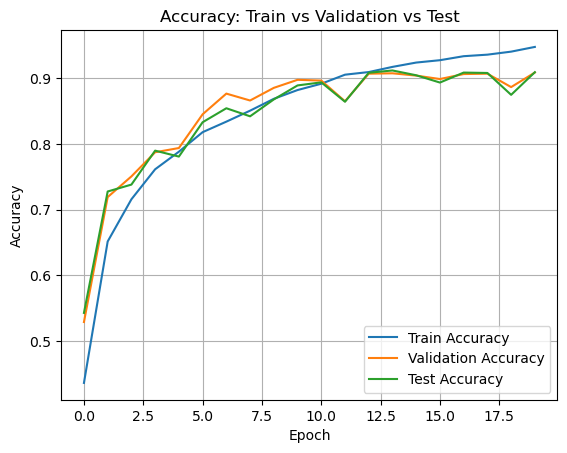

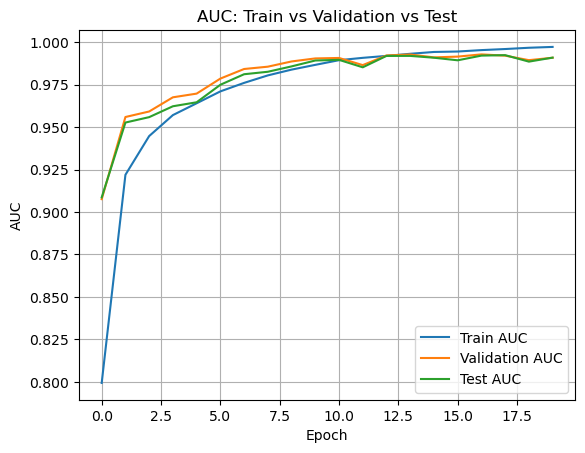

In [126]:
# Train model: BMI_ResNet18, 28
model = "BMI_ResNet18"
res = "28x28"
save_path = f"models/{model}_{res}.pth"
epochs = 20

BMI_ResNet18_28 = BMI_ResNet18(in_channels = 3, num_classes = 8)

train_model(BMI_ResNet18_28, train28, val28, test28, epochs = epochs, save_path = save_path)

In [ ]:
# Train model: BMI_ResNet18, 64
model = "BMI_ResNet18"
res = "64x64"
save_path = f"models/{model}_{res}.pth"
epochs = 20

BMI_ResNet18_64 = BMI_ResNet18(in_channels = 3, num_classes = 8)

train_model(BMI_ResNet18_64, train64, val64, test64, epochs = epochs, save_path = save_path)

In [ ]:
# Train model: BMI_ResNet50, 28
model = "BMI_ResNet50"
res = "28x28"
save_path = f"models/{model}_{res}.pth"
epochs = 20

BMI_ResNet50_28 = BMI_ResNet50(in_channels = 3, num_classes = 8)

train_model(BMI_ResNet50_28, train28, val28, test28, epochs = epochs, save_path = save_path)

In [ ]:
# Train model: BMI_ResNet50, 64
model = "BMI_ResNet50"
res = "64x64"
save_path = f"models/{model}_{res}.pth"
epochs = 20

BMI_ResNet50_64 = BMI_ResNet50(in_channels = 3, num_classes = 8)

train_model(BMI_ResNet50_64, train64, val64, test64, epochs = epochs, save_path = save_path)

#### Accuracy and AUC: Original Paper

In [ ]:
# Train model: ResNet18, 28
model = "ResNet18"
res = "28x28"
save_path = f"models/{model}_{res}.pth"
epochs = 20

model_r18_28 = ResNet18(in_channels = 3, num_classes = 8)

train_model(model_r18_28, train28, val28, test28, epochs = epochs, save_path = save_path)

In [ ]:
# Train model: ResNet18, 64
model = "ResNet18"
res = "64x64"
save_path = f"models/{model}_{res}.pth"
epochs = 20

model_r18_64 = ResNet18(in_channels = 3, num_classes = 8)

train_model(model_r18_64, train64, val64, test64, epochs = epochs, save_path = save_path)

In [ ]:
# Train model: ResNet50, 28
model = "ResNet50"
res = "28x28"
save_path = f"models/{model}_{res}.pth"
epochs = 20

model_r50_28 = ResNet50(in_channels = 3, num_classes = 8)

train_model(model_r50_28, train28, val28, test28, epochs = epochs, save_path = save_path)

In [ ]:
# Train model: ResNet50, 64
model = "ResNet50"
res = "64x64"
save_path = f"models/{model}_{res}.pth"
epochs = 20

model_r50_64 = ResNet18(in_channels = 3, num_classes = 8)

train_model(model_r50_64, train64, val64, test64, epochs = epochs, save_path = save_path)